# Exercises
Within your `codeup-data-science` directory, create a new repo named `advanced-topics`. This will be where you do your work for this module. Create a repository on GitHub with the same name, and link your local repository to GitHub.

Save this work in your `advanced-topics` repo. Then add, commit, and push your changes.

Do your work for this exercise in a jupyter notebook or python script named `cross_validation`.

Use the cross validation techniques discussed in the lesson to figure out what kind of model works best with the cars dataset used in the lesson.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LassoLars, LassoLarsCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from pydataset import data

df = data('mpg')


In [2]:
# data('mpg', show_doc=True)

In [3]:
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [4]:
df.trans = np.where(df.trans.str.startswith('auto'), 'auto', 'manual')

In [5]:
df = df.drop(columns=['manufacturer', 'model'])

In [7]:
from wrangle import split_data, X_y_split

In [8]:
train, validate, test = split_data(df, strat_by='trans', rand_st=123)

Prepared df: (234, 9)

Train: (140, 9)
Validate: (47, 9)
Test: (47, 9)


In [163]:
train.drv.unique()

array(['4', 'f', 'r'], dtype=object)

In [164]:
for x in train.drv.unique():
    print(x)
    # print(train.trans[train.drv == x].count)

4
f
r


In [167]:
train.groupby(train.drv).trans.value_counts()

drv  trans 
4    auto      48
     manual    14
f    auto      38
     manual    26
r    auto       8
     manual     6
Name: trans, dtype: int64

In [168]:
train.groupby(train['class']).trans.value_counts()

class       trans 
2seater     manual     2
compact     auto      14
            manual    13
midsize     auto      17
            manual     9
minivan     auto       7
pickup      auto      14
            manual     7
subcompact  manual    13
            auto      10
suv         auto      32
            manual     2
Name: trans, dtype: int64

In [170]:
train.groupby(train['trans'])['class'].value_counts()

trans   class     
auto    suv           32
        midsize       17
        compact       14
        pickup        14
        subcompact    10
        minivan        7
manual  compact       13
        subcompact    13
        midsize        9
        pickup         7
        2seater        2
        suv            2
Name: class, dtype: int64

In [9]:
X_train, y_train = X_y_split(train, 'trans')
X_validate, y_validate = X_y_split(validate, 'trans')
X_test, y_test = X_y_split(test, 'trans')


In [10]:
# X_train

In [11]:
X_train.fl.value_counts()

r    107
p     25
e      5
d      2
c      1
Name: fl, dtype: int64

In [12]:
# sns.pairplot(train)

In [13]:
# X_train = X_train.drop(columns=['manufacturer', 'model'])

In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 126 to 110
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   displ   140 non-null    float64
 1   year    140 non-null    int64  
 2   cyl     140 non-null    int64  
 3   drv     140 non-null    object 
 4   cty     140 non-null    int64  
 5   hwy     140 non-null    int64  
 6   fl      140 non-null    object 
 7   class   140 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 9.8+ KB


In [15]:
# pd.get_dummies(X_train).head()

In [16]:
# ['class', 'drv', 'fl']

In [15]:
# X_train['class'].values.dtype

In [16]:
# cols_list = []

# for x in X_train:
#     if X_train[x].values.dtype != 'O':
#         continue
#     else:
#         cols_list.append(x)

# cols_list

In [17]:
# drops = []

# for i in cols_list:
#     drops.extend(X_train[i].value_counts()[-1:].index.to_list())

# drops

In [18]:
# drops = []

# for x in X_train:
#     if X_train[x].values.dtype != 'O':
#         continue
#     else:
#         y = X_train[x].value_counts()[-1:].index.to_list()[0]
#         # print(x,y)
#         x = ''.join([x, '_', y])
#         # print(x)
#         drops.append(x)

# drops

In [20]:
# cols_list, '_', drops

In [21]:
# X_train['class'].value_counts()

In [22]:
# X_train.drv.value_counts()

In [23]:
# X_train.fl.value_counts()[-1:].index.to_list()

In [24]:
# drop_dummy_cols = ['fl_c', 'drv_r', 'class_2seater']

In [25]:
# X_dum = pd.get_dummies(X_train).drop(columns=drop_dummy_cols)

In [17]:
from wrangle import get_dummies

# X_dum = get_dummies(X_train)

In [18]:
X_train, X_validate, X_test = get_dummies(X_train, X_validate, X_test)
# X_validate = get_dummies(X_validate)
# X_test = get_dummies(X_test)


added column= 'fl_d' to test, full of zeros
added column= 'fl_e' to test, full of zeros
X_train (140, 17), X_validate (47, 17), X_test (47, 17)


In [15]:
# X_dum

In [19]:
from wrangle import scale_data

In [20]:
X_train.shape, X_validate.shape, X_test.shape

((140, 17), (47, 17), (47, 17))

In [54]:
# for x in X_train:
#     # print(x)
#     if x not in X_validate.columns:
#         X_validate[x] = np.zeros(shape= len(X_validate))
#         print(f'added column= \'{x}\' to validate, full of zeros')
#     if x not in X_test.columns:
#         X_test[x] = np.zeros(shape= len(X_test))
#         print(f'added column= \'{x}\' to test, full of zeros')

In [57]:
# for x in X_test.columns:
#     if x not in X_train.columns:
#         print(x)

class_2seater


In [51]:
# len(X_test)

47

In [52]:
# np.zeros(shape= len(X_validate))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [60]:
# train['class'].value_counts(dropna= False)

suv           34
compact       27
midsize       26
subcompact    23
pickup        21
minivan        7
2seater        2
Name: class, dtype: int64

In [58]:
# X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 126 to 110
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   displ             140 non-null    float64
 1   year              140 non-null    int64  
 2   cyl               140 non-null    int64  
 3   cty               140 non-null    int64  
 4   hwy               140 non-null    int64  
 5   drv_4             140 non-null    uint8  
 6   drv_f             140 non-null    uint8  
 7   fl_d              140 non-null    uint8  
 8   fl_e              140 non-null    uint8  
 9   fl_p              140 non-null    uint8  
 10  fl_r              140 non-null    uint8  
 11  class_compact     140 non-null    uint8  
 12  class_midsize     140 non-null    uint8  
 13  class_minivan     140 non-null    uint8  
 14  class_pickup      140 non-null    uint8  
 15  class_subcompact  140 non-null    uint8  
 16  class_suv         140 non-null    uint8  


In [61]:
# X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 87 to 137
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   displ             47 non-null     float64
 1   year              47 non-null     int64  
 2   cyl               47 non-null     int64  
 3   cty               47 non-null     int64  
 4   hwy               47 non-null     int64  
 5   drv_4             47 non-null     uint8  
 6   drv_f             47 non-null     uint8  
 7   fl_r              47 non-null     uint8  
 8   class_2seater     47 non-null     uint8  
 9   class_compact     47 non-null     uint8  
 10  class_midsize     47 non-null     uint8  
 11  class_pickup      47 non-null     uint8  
 12  class_subcompact  47 non-null     uint8  
 13  class_suv         47 non-null     uint8  
 14  fl_d              47 non-null     float64
 15  fl_e              47 non-null     float64
 16  fl_p              47 non-null     float64
 1

In [46]:
# X_validate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 57 to 64
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   displ             47 non-null     float64
 1   year              47 non-null     int64  
 2   cyl               47 non-null     int64  
 3   cty               47 non-null     int64  
 4   hwy               47 non-null     int64  
 5   drv_4             47 non-null     uint8  
 6   drv_f             47 non-null     uint8  
 7   fl_d              47 non-null     uint8  
 8   fl_p              47 non-null     uint8  
 9   fl_r              47 non-null     uint8  
 10  class_compact     47 non-null     uint8  
 11  class_midsize     47 non-null     uint8  
 12  class_minivan     47 non-null     uint8  
 13  class_pickup      47 non-null     uint8  
 14  class_subcompact  47 non-null     uint8  
 15  class_suv         47 non-null     uint8  
dtypes: float64(1), int64(4), uint8(11)
memory usa

In [21]:
X_train, X_validate, X_test = scale_data(X_train, X_validate, X_test)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [22]:
X_train.head()

,displ,year,cyl,cty,hwy,drv_4,drv_f,fl_d,fl_e,fl_p,fl_r,class_compact,class_midsize,class_minivan,class_pickup,class_subcompact,class_suv
126,0.574074,0.0,1.0,0.208333,0.15625,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
104,0.000000,0.0,0.0,0.625000,0.62500,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
28,1.000000,1.0,1.0,0.250000,0.37500,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172,0.166667,1.0,0.0,0.416667,0.40625,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
198,0.037037,1.0,0.0,0.708333,0.71875,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [30]:
tree = DecisionTreeClassifier(max_depth=5, random_state= 617)

In [31]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=617)

In [32]:
tree.score(X_train, y_train)


0.7428571428571429

In [33]:

tree.score(X_validate, y_validate)


0.5957446808510638

In [34]:
tree.score(X_test, y_test)


0.6595744680851063

In [35]:
from sklearn.model_selection import cross_val_score


cross_val_score(tree, X_train, y_train, cv=5)

array([0.53571429, 0.64285714, 0.53571429, 0.64285714, 0.64285714])

In [36]:
cross_val_score(tree, X_train, y_train, cv=7,).mean()

0.5285714285714286

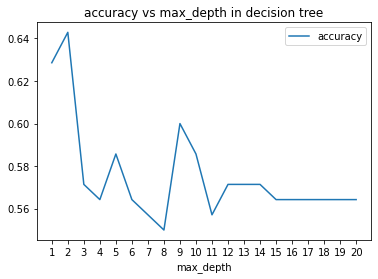

In [37]:
results = []

for x in range(1,21):
    tree = DecisionTreeClassifier(max_depth=x, random_state=123)
    score = cross_val_score(tree, X_train, y_train, cv=5).mean()
    results.append([x, score])
    
pd.DataFrame(results, columns = ['max_depth','accuracy'])\
.set_index('max_depth').plot(xticks=range(1,21))
plt.title('accuracy vs max_depth in decision tree')
plt.show()

In [38]:
knn = KNeighborsClassifier()

In [87]:
params = {'n_neighbors': range(1,21),
          'p': [1,2],
          'n_jobs': [-1, 1]
}
params

{'n_neighbors': range(1, 21), 'p': [1, 2], 'n_jobs': [-1, 1]}

In [88]:
grid = GridSearchCV(knn, param_grid=params, cv=5, n_jobs= -1)

In [89]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_jobs': [-1, 1], 'n_neighbors': range(1, 21),
                         'p': [1, 2]})

In [90]:
grid.cv_results_['mean_test_score']

array([0.55      , 0.55714286, 0.62142857, 0.62142857, 0.56428571,
       0.56428571, 0.59285714, 0.59285714, 0.57857143, 0.56428571,
       0.57142857, 0.57142857, 0.57142857, 0.56428571, 0.6       ,
       0.6       , 0.58571429, 0.59285714, 0.61428571, 0.61428571,
       0.61428571, 0.61428571, 0.62857143, 0.62142857, 0.63571429,
       0.65714286, 0.62857143, 0.64285714, 0.65      , 0.64285714,
       0.62142857, 0.61428571, 0.65714286, 0.65      , 0.64285714,
       0.61428571, 0.65      , 0.63571429, 0.62857143, 0.62857143,
       0.55      , 0.55714286, 0.62142857, 0.62142857, 0.56428571,
       0.56428571, 0.59285714, 0.59285714, 0.57857143, 0.56428571,
       0.57142857, 0.57142857, 0.57142857, 0.56428571, 0.6       ,
       0.6       , 0.58571429, 0.59285714, 0.61428571, 0.61428571,
       0.61428571, 0.61428571, 0.62857143, 0.62142857, 0.63571429,
       0.65714286, 0.62857143, 0.64285714, 0.65      , 0.64285714,
       0.62142857, 0.61428571, 0.65714286, 0.65      , 0.64285

In [91]:
grid.best_estimator_

KNeighborsClassifier(n_jobs=-1, n_neighbors=13)

In [92]:
grid.best_score_

0.6571428571428573

In [93]:
grid.best_params_

{'n_jobs': -1, 'n_neighbors': 13, 'p': 2}

In [94]:
grid.cv_results_['mean_fit_time']

array([0.00138159, 0.00198092, 0.00091624, 0.00097013, 0.00085626,
       0.00082941, 0.00121264, 0.00086713, 0.00077534, 0.0007884 ,
       0.00077209, 0.00075755, 0.00100946, 0.00076342, 0.00081553,
       0.00085897, 0.00120473, 0.00089459, 0.00090275, 0.00076885,
       0.00077486, 0.00077128, 0.00078373, 0.00079522, 0.0007637 ,
       0.00082612, 0.00081267, 0.00079546, 0.00076346, 0.00077877,
       0.00076036, 0.00078077, 0.00089698, 0.00080252, 0.00153379,
       0.00121851, 0.00078287, 0.00103674, 0.00125461, 0.00079217,
       0.00279388, 0.00118904, 0.00072222, 0.00063486, 0.00086908,
       0.00075488, 0.00060277, 0.000629  , 0.00059204, 0.00185289,
       0.00053978, 0.00060539, 0.00060277, 0.0005476 , 0.00117321,
       0.00053577, 0.00064611, 0.00079489, 0.00054154, 0.00052762,
       0.00180154, 0.00071287, 0.00107017, 0.00054278, 0.000563  ,
       0.00052547, 0.0017107 , 0.00059576, 0.0012042 , 0.00055208,
       0.00120478, 0.00055046, 0.00109081, 0.00118523, 0.00058

In [95]:
grid.best_estimator_.fit(X_train, y_train).score(X_validate, y_validate)

0.6595744680851063

In [96]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_jobs', 'param_n_neighbors', 'param_p', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [97]:
grid.cv_results_['rank_test_score']

array([79, 77, 29, 29, 69, 69, 55, 53, 61, 69, 63, 63, 63, 69, 49, 49, 59,
       55, 37, 45, 37, 45, 21, 35, 17,  1, 23, 11,  5, 11, 29, 37,  1,  5,
       11, 37,  9, 17, 23, 23, 79, 77, 29, 29, 69, 69, 55, 53, 61, 69, 63,
       63, 63, 69, 49, 49, 59, 55, 37, 45, 37, 45, 21, 35, 17,  1, 23, 11,
        5, 11, 29, 37,  1,  5, 11, 37,  9, 17, 23, 23], dtype=int32)

In [98]:
list(zip(grid.cv_results_['params'], grid.cv_results_['mean_test_score']))

[({'n_jobs': -1, 'n_neighbors': 1, 'p': 1}, 0.55),
 ({'n_jobs': -1, 'n_neighbors': 1, 'p': 2}, 0.5571428571428572),
 ({'n_jobs': -1, 'n_neighbors': 2, 'p': 1}, 0.6214285714285714),
 ({'n_jobs': -1, 'n_neighbors': 2, 'p': 2}, 0.6214285714285714),
 ({'n_jobs': -1, 'n_neighbors': 3, 'p': 1}, 0.5642857142857143),
 ({'n_jobs': -1, 'n_neighbors': 3, 'p': 2}, 0.5642857142857143),
 ({'n_jobs': -1, 'n_neighbors': 4, 'p': 1}, 0.5928571428571427),
 ({'n_jobs': -1, 'n_neighbors': 4, 'p': 2}, 0.5928571428571429),
 ({'n_jobs': -1, 'n_neighbors': 5, 'p': 1}, 0.5785714285714286),
 ({'n_jobs': -1, 'n_neighbors': 5, 'p': 2}, 0.5642857142857143),
 ({'n_jobs': -1, 'n_neighbors': 6, 'p': 1}, 0.5714285714285714),
 ({'n_jobs': -1, 'n_neighbors': 6, 'p': 2}, 0.5714285714285714),
 ({'n_jobs': -1, 'n_neighbors': 7, 'p': 1}, 0.5714285714285714),
 ({'n_jobs': -1, 'n_neighbors': 7, 'p': 2}, 0.5642857142857143),
 ({'n_jobs': -1, 'n_neighbors': 8, 'p': 1}, 0.6),
 ({'n_jobs': -1, 'n_neighbors': 8, 'p': 2}, 0.6),
 ({'

In [101]:
for param, score in zip(grid.cv_results_['params'], 
                         grid.cv_results_['mean_test_score']):
        param['score'] = score


In [102]:
params.keys()

dict_keys(['n_neighbors', 'p', 'n_jobs'])

In [103]:
param

{'n_jobs': 1, 'n_neighbors': 20, 'p': 2, 'score': 0.6285714285714286}

In [104]:
pd.DataFrame(grid.cv_results_['params']).sort_values('score', ascending=False).head(1)

,n_jobs,n_neighbors,p,score
25,-1,13,2,0.657143


In [106]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_jobs', 'param_n_neighbors', 'param_p', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [109]:
grid_results = pd.DataFrame(grid.cv_results_['params'])
# grid_results

,n_jobs,n_neighbors,p,score
0,-1,1,1,0.550000
1,-1,1,2,0.557143
2,-1,2,1,0.621429
3,-1,2,2,0.621429
4,-1,3,1,0.564286
5,-1,3,2,0.564286
6,-1,4,1,0.592857
7,-1,4,2,0.592857
8,-1,5,1,0.578571
9,-1,5,2,0.564286


In [110]:
grid_results['rank_test_scores'] = grid.cv_results_['rank_test_score']

In [113]:
grid_results['mean_fit_time'] = grid.cv_results_['mean_fit_time']
grid_results['mean_score_time'] = grid.cv_results_['mean_score_time']

In [115]:
grid_results['avg_time'] = grid_results.mean_fit_time + grid_results.mean_score_time

In [117]:
grid_results.drop(columns= ['mean_fit_time', 'mean_score_time'], inplace=True)

In [118]:
grid_results.sort_values('score', ascending=False).head()

,n_jobs,n_neighbors,p,score,rank_test_scores,avg_time
25,-1,13,2,0.657143,1,0.007218
65,1,13,2,0.657143,1,0.001314
32,-1,17,1,0.657143,1,0.006815
72,1,17,1,0.657143,1,0.002514
33,-1,17,2,0.650000,5,0.006741


In [133]:
grid_results.sort_values(['rank_test_scores', 'avg_time']).head()

,n_jobs,n_neighbors,p,score,rank_test_scores,avg_time
65,1,13,2,0.657143,1,0.001314
72,1,17,1,0.657143,1,0.002514
32,-1,17,1,0.657143,1,0.006815
25,-1,13,2,0.657143,1,0.007218
73,1,17,2,0.650000,5,0.002677


In [121]:
grid.cv_results_['rank_test_score']

array([79, 77, 29, 29, 69, 69, 55, 53, 61, 69, 63, 63, 63, 69, 49, 49, 59,
       55, 37, 45, 37, 45, 21, 35, 17,  1, 23, 11,  5, 11, 29, 37,  1,  5,
       11, 37,  9, 17, 23, 23, 79, 77, 29, 29, 69, 69, 55, 53, 61, 69, 63,
       63, 63, 69, 49, 49, 59, 55, 37, 45, 37, 45, 21, 35, 17,  1, 23, 11,
        5, 11, 29, 37,  1,  5, 11, 37,  9, 17, 23, 23], dtype=int32)

In [137]:
forest = RandomForestClassifier(oob_score= True, random_state=617)

In [139]:
params_forest = {'n_estimators': [100, 50],
                'criterion': ['gini', 'entropy'],
                'max_depth': [10, 20, None],
                'min_samples_split': [2,],
                'min_samples_leaf': [1,],
                'n_jobs': [1,],
}

A random forest classifier.

    A random forest is a meta estimator that fits a number of decision tree
    classifiers on various sub-samples of the dataset and uses averaging to
    improve the predictive accuracy and control over-fitting.
    The sub-sample size is controlled with the `max_samples` parameter if
    `bootstrap=True` (default), otherwise the whole dataset is used to build
    each tree.

    Read more in the :ref:`User Guide <forest>`.

    Parameters
    ----------
    n_estimators : int, default=100
        The number of trees in the forest.

        .. versionchanged:: 0.22
           The default value of ``n_estimators`` changed from 10 to 100
           in 0.22.

    criterion : {"gini", "entropy"}, default="gini"
        The function to measure the quality of a split. Supported criteria are
        "gini" for the Gini impurity and "entropy" for the information gain.
        Note: this parameter is tree-specific.

    max_depth : int, default=None
        The maximum depth of the tree. If None, then nodes are expanded until
        all leaves are pure or until all leaves contain less than
        min_samples_split samples.

    min_samples_split : int or float, default=2
        The minimum number of samples required to split an internal node:

        - If int, then consider `min_samples_split` as the minimum number.
        - If float, then `min_samples_split` is a fraction and
          `ceil(min_samples_split * n_samples)` are the minimum
          number of samples for each split.

        .. versionchanged:: 0.18
           Added float values for fractions.

    min_samples_leaf : int or float, default=1
        The minimum number of samples required to be at a leaf node.
        A split point at any depth will only be considered if it leaves at
        least ``min_samples_leaf`` training samples in each of the left and
        right branches.  This may have the effect of smoothing the model,
        especially in regression.

        - If int, then consider `min_samples_leaf` as the minimum number.
        - If float, then `min_samples_leaf` is a fraction and
          `ceil(min_samples_leaf * n_samples)` are the minimum
          number of samples for each node.

        .. versionchanged:: 0.18
           Added float values for fractions.

    min_weight_fraction_leaf : float, default=0.0
        The minimum weighted fraction of the sum total of weights (of all
        the input samples) required to be at a leaf node. Samples have
        equal weight when sample_weight is not provided.

    max_features : {"auto", "sqrt", "log2"}, int or float, default="auto"
        The number of features to consider when looking for the best split:

        - If int, then consider `max_features` features at each split.
        - If float, then `max_features` is a fraction and
          `round(max_features * n_features)` features are considered at each
          split.
        - If "auto", then `max_features=sqrt(n_features)`.
        - If "sqrt", then `max_features=sqrt(n_features)` (same as "auto").
        - If "log2", then `max_features=log2(n_features)`.
        - If None, then `max_features=n_features`.

        Note: the search for a split does not stop until at least one
        valid partition of the node samples is found, even if it requires to
        effectively inspect more than ``max_features`` features.

    max_leaf_nodes : int, default=None
        Grow trees with ``max_leaf_nodes`` in best-first fashion.
        Best nodes are defined as relative reduction in impurity.
        If None then unlimited number of leaf nodes.

    min_impurity_decrease : float, default=0.0
        A node will be split if this split induces a decrease of the impurity
        greater than or equal to this value.

        The weighted impurity decrease equation is the following::

            N_t / N * (impurity - N_t_R / N_t * right_impurity
                                - N_t_L / N_t * left_impurity)

        where ``N`` is the total number of samples, ``N_t`` is the number of
        samples at the current node, ``N_t_L`` is the number of samples in the
        left child, and ``N_t_R`` is the number of samples in the right child.

        ``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,
        if ``sample_weight`` is passed.

        .. versionadded:: 0.19

    bootstrap : bool, default=True
        Whether bootstrap samples are used when building trees. If False, the
        whole dataset is used to build each tree.

    oob_score : bool, default=False
        Whether to use out-of-bag samples to estimate the generalization score.
        Only available if bootstrap=True.

    n_jobs : int, default=None
        The number of jobs to run in parallel. :meth:`fit`, :meth:`predict`,
        :meth:`decision_path` and :meth:`apply` are all parallelized over the
        trees. ``None`` means 1 unless in a :obj:`joblib.parallel_backend`
        context. ``-1`` means using all processors. See :term:`Glossary
        <n_jobs>` for more details.

    random_state : int, RandomState instance or None, default=None
        Controls both the randomness of the bootstrapping of the samples used
        when building trees (if ``bootstrap=True``) and the sampling of the
        features to consider when looking for the best split at each node
        (if ``max_features < n_features``).
        See :term:`Glossary <random_state>` for details.

    verbose : int, default=0
        Controls the verbosity when fitting and predicting.

    warm_start : bool, default=False
        When set to ``True``, reuse the solution of the previous call to fit
        and add more estimators to the ensemble, otherwise, just fit a whole
        new forest. See :term:`the Glossary <warm_start>`.

    class_weight : {"balanced", "balanced_subsample"}, dict or list of dicts, \
            default=None
        Weights associated with classes in the form ``{class_label: weight}``.
        If not given, all classes are supposed to have weight one. For
        multi-output problems, a list of dicts can be provided in the same
        order as the columns of y.

        Note that for multioutput (including multilabel) weights should be
        defined for each class of every column in its own dict. For example,
        for four-class multilabel classification weights should be
        [{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 1}, {0: 1, 1: 1}] instead of
        [{1:1}, {2:5}, {3:1}, {4:1}].

        The "balanced" mode uses the values of y to automatically adjust
        weights inversely proportional to class frequencies in the input data
        as ``n_samples / (n_classes * np.bincount(y))``

        The "balanced_subsample" mode is the same as "balanced" except that
        weights are computed based on the bootstrap sample for every tree
        grown.

        For multi-output, the weights of each column of y will be multiplied.

        Note that these weights will be multiplied with sample_weight (passed
        through the fit method) if sample_weight is specified.

    ccp_alpha : non-negative float, default=0.0
        Complexity parameter used for Minimal Cost-Complexity Pruning. The
        subtree with the largest cost complexity that is smaller than
        ``ccp_alpha`` will be chosen. By default, no pruning is performed. See
        :ref:`minimal_cost_complexity_pruning` for details.

        .. versionadded:: 0.22

    max_samples : int or float, default=None
        If bootstrap is True, the number of samples to draw from X
        to train each base estimator.

        - If None (default), then draw `X.shape[0]` samples.
        - If int, then draw `max_samples` samples.
        - If float, then draw `max_samples * X.shape[0]` samples. Thus,
          `max_samples` should be in the interval `(0.0, 1.0]`.

        .. versionadded:: 0.22

    Attributes
    ----------
    base_estimator_ : DecisionTreeClassifier
        The child estimator template used to create the collection of fitted
        sub-estimators.

    estimators_ : list of DecisionTreeClassifier
        The collection of fitted sub-estimators.

    classes_ : ndarray of shape (n_classes,) or a list of such arrays
        The classes labels (single output problem), or a list of arrays of
        class labels (multi-output problem).

    n_classes_ : int or list
        The number of classes (single output problem), or a list containing the
        number of classes for each output (multi-output problem).

    n_features_ : int
        The number of features when ``fit`` is performed.

        .. deprecated:: 1.0
            Attribute `n_features_` was deprecated in version 1.0 and will be
            removed in 1.2. Use `n_features_in_` instead.

    n_features_in_ : int
        Number of features seen during :term:`fit`.

        .. versionadded:: 0.24

    feature_names_in_ : ndarray of shape (`n_features_in_`,)
        Names of features seen during :term:`fit`. Defined only when `X`
        has feature names that are all strings.

        .. versionadded:: 1.0

    n_outputs_ : int
        The number of outputs when ``fit`` is performed.

    feature_importances_ : ndarray of shape (n_features,)
        The impurity-based feature importances.
        The higher, the more important the feature.
        The importance of a feature is computed as the (normalized)
        total reduction of the criterion brought by that feature.  It is also
        known as the Gini importance.

        Warning: impurity-based feature importances can be misleading for
        high cardinality features (many unique values). See
        :func:`sklearn.inspection.permutation_importance` as an alternative.

    oob_score_ : float
        Score of the training dataset obtained using an out-of-bag estimate.
        This attribute exists only when ``oob_score`` is True.

    oob_decision_function_ : ndarray of shape (n_samples, n_classes) or \
            (n_samples, n_classes, n_outputs)
        Decision function computed with out-of-bag estimate on the training
        set. If n_estimators is small it might be possible that a data point
        was never left out during the bootstrap. In this case,
        `oob_decision_function_` might contain NaN. This attribute exists
        only when ``oob_score`` is True.

    See Also
    --------
    sklearn.tree.DecisionTreeClassifier : A decision tree classifier.
    sklearn.ensemble.ExtraTreesClassifier : Ensemble of extremely randomized
        tree classifiers.

    Notes
    -----
    The default values for the parameters controlling the size of the trees
    (e.g. ``max_depth``, ``min_samples_leaf``, etc.) lead to fully grown and
    unpruned trees which can potentially be very large on some data sets. To
    reduce memory consumption, the complexity and size of the trees should be
    controlled by setting those parameter values.

    The features are always randomly permuted at each split. Therefore,
    the best found split may vary, even with the same training data,
    ``max_features=n_features`` and ``bootstrap=False``, if the improvement
    of the criterion is identical for several splits enumerated during the
    search of the best split. To obtain a deterministic behaviour during
    fitting, ``random_state`` has to be fixed.

    References
    ----------
    .. [1] L. Breiman, "Random Forests", Machine Learning, 45(1), 5-32, 2001.


In [129]:
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 617,
 'verbose': 0,
 'warm_start': False}

In [140]:
grid_forest = GridSearchCV(forest, params_forest, cv=5)

In [141]:
grid_forest.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(oob_score=True, random_state=617),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, None], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [100, 50],
                         'n_jobs': [1]})

In [146]:
forest_results = pd.DataFrame(grid_forest.cv_results_['params'])
forest_results['rank_test_scores'] = grid_forest.cv_results_['rank_test_score']
forest_results['mean_test_scores'] = grid_forest.cv_results_['mean_test_score']
forest_results['mean_fit_time'] = grid_forest.cv_results_['mean_fit_time']
forest_results['mean_score_time'] = grid_forest.cv_results_['mean_score_time']
forest_results['avg_time'] = forest_results.mean_fit_time + forest_results.mean_score_time
forest_results.drop(columns= ['mean_fit_time', 'mean_score_time'], inplace=True)


In [147]:
forest_results.sort_values(['rank_test_scores', 'avg_time']).head()

,criterion,max_depth,min_samples_leaf,min_samples_split,n_estimators,n_jobs,rank_test_scores,mean_test_scores,avg_time
11,entropy,NaN,1,2,50,1,1,0.550000,0.027472
9,entropy,20.0,1,2,50,1,1,0.550000,0.027813
2,gini,20.0,1,2,100,1,3,0.542857,0.054098
4,gini,NaN,1,2,100,1,3,0.542857,0.054722
7,entropy,10.0,1,2,50,1,5,0.535714,0.028249


In [145]:
grid_forest.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'param_n_estimators', 'param_n_jobs', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [148]:
grid_forest.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50,
 'n_jobs': 1}

In [149]:
grid_forest.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=50,
                       n_jobs=1, oob_score=True, random_state=617)

In [150]:
best_forest = grid_forest.best_estimator_

In [151]:
best_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=50,
                       n_jobs=1, oob_score=True, random_state=617)

In [152]:
best_forest.score(X_validate, y_validate)

0.6382978723404256

In [171]:
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC

In [172]:
nb = GaussianNB()

In [173]:
nb.fit(X_train, y_train)

GaussianNB()

In [180]:
nb.predict(X_train)

array(['auto', 'manual', 'manual', 'manual', 'manual', 'manual', 'auto',
       'auto', 'manual', 'manual', 'manual', 'manual', 'manual', 'manual',
       'auto', 'manual', 'manual', 'auto', 'manual', 'manual', 'manual',
       'manual', 'manual', 'auto', 'manual', 'manual', 'manual', 'manual',
       'auto', 'manual', 'auto', 'auto', 'auto', 'manual', 'manual',
       'auto', 'manual', 'manual', 'manual', 'auto', 'manual', 'manual',
       'auto', 'auto', 'auto', 'auto', 'manual', 'manual', 'manual',
       'auto', 'manual', 'manual', 'manual', 'manual', 'auto', 'auto',
       'manual', 'manual', 'manual', 'auto', 'auto', 'manual', 'manual',
       'manual', 'manual', 'manual', 'manual', 'manual', 'manual', 'auto',
       'manual', 'manual', 'manual', 'auto', 'manual', 'manual', 'manual',
       'manual', 'manual', 'auto', 'auto', 'manual', 'manual', 'manual',
       'manual', 'auto', 'manual', 'manual', 'manual', 'auto', 'auto',
       'manual', 'manual', 'auto', 'manual', 'manual', 

In [182]:
y_train.values

array(['auto', 'auto', 'manual', 'manual', 'auto', 'auto', 'auto', 'auto',
       'manual', 'auto', 'manual', 'auto', 'auto', 'auto', 'auto',
       'manual', 'auto', 'auto', 'auto', 'manual', 'auto', 'auto', 'auto',
       'auto', 'auto', 'manual', 'manual', 'auto', 'auto', 'manual',
       'auto', 'manual', 'auto', 'auto', 'auto', 'manual', 'auto', 'auto',
       'auto', 'auto', 'auto', 'manual', 'auto', 'auto', 'auto', 'auto',
       'auto', 'auto', 'manual', 'auto', 'auto', 'manual', 'manual',
       'auto', 'auto', 'auto', 'manual', 'auto', 'manual', 'auto', 'auto',
       'auto', 'auto', 'manual', 'auto', 'manual', 'auto', 'auto',
       'manual', 'manual', 'auto', 'auto', 'manual', 'auto', 'manual',
       'auto', 'auto', 'auto', 'auto', 'auto', 'auto', 'auto', 'auto',
       'manual', 'auto', 'auto', 'auto', 'auto', 'auto', 'auto', 'auto',
       'auto', 'manual', 'auto', 'manual', 'manual', 'manual', 'auto',
       'auto', 'manual', 'manual', 'manual', 'auto', 'auto', 'auto',


In [175]:
nb.score(X_train, y_train)

0.5857142857142857

In [176]:
nb.score(X_validate, y_validate)

0.6170212765957447

In [183]:
nb.class_prior_

array([0.67142857, 0.32857143])

In [184]:
mlp = MLPClassifier(activation='relu', solver='lbfgs', alpha=0.0001, learning_rate= 'adaptive')